In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as img

Saving hero1.jpeg to hero1.jpeg


Saving hero2.jpeg to hero2.jpeg


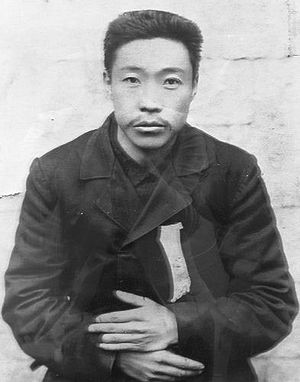

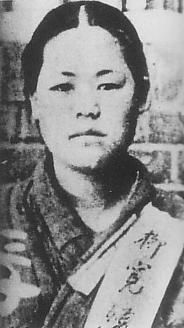

In [3]:
# I1 = cv2.imread('fingerprint.jpg', cv2.IMREAD_GRAYSCALE)
# I2 = cv2.imread('cameraman.tif', cv2.IMREAD_GRAYSCALE)
# cv2.imshow('image', I1)
# cv2.imshow('image2', I2)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

from google.colab import files
myfile = files.upload()
myfile2 = files.upload()

I1 = cv2.imread('hero1.jpeg', cv2.IMREAD_GRAYSCALE)
I2 = cv2.imread('hero2.jpeg', cv2.IMREAD_GRAYSCALE)

from google.colab.patches import cv2_imshow 
cv2_imshow(I1)
cv2_imshow(I2)

In [4]:
result1 = np.zeros((I1.shape[0]*2, I1.shape[1]*2), dtype=np.uint8)
result2 = np.zeros((I2.shape[0]*2, I2.shape[1]*2), dtype=np.uint8)

In [44]:
def ghpfs(img, D_zero):
    
    # Step2. 입력 이미지의 가로와 세로 2배 길이로 one padding하세요. 
    img_padded = np.pad(img, ((0, img.shape[0]), (0,img.shape[1])), 'constant', constant_values = 1)   # 여기 채워넣기
    
    # Step3. Step2의 결과를 FFT 시키세요 
    f =  np.fft.fft2(img_padded)                                                                          # 여기 채워넣기
    
    # Step4. Step3의 결과를 FFT shift 시키세요.
    f_centered = np.fft.fftshift(f)                                                                 # 여기 채워넣기
    
    # Step5. Gaussian High Pass Filter를 만드세요. 
    P, Q = img_padded.shape
    v = np.linspace(0, P-1, P) # 세로
    h = np.linspace(0, Q-1, Q) # 가로
    [X, Y] = np.meshgrid(h, v)                                   
    
    ones = np.ones((img_padded.shape[0], img_padded.shape[1]), dtype=np.uint8)
    hpf =  ones - np.exp(((X-Q/2)**2+(Y-P/2)**2)/(-2*(D_zero**2)))                   # 여기 채워넣기
    
    # Step6. Step4의 결과와 High Pass Filter를 곱하세요. 
    mul = f_centered * hpf                                                                       # 여기 채워넣기
    
    # Step7. Step6의 결과를 Inverse FFT shift 시키고 Inverse FFT 시키세요.
    if_centered = np.fft.ifftshift(mul)                                                               # 여기 채워넣기
    if_ = np.fft.ifft2(if_centered)                                                                       # 여기 채워넣기

    #Step 8 Step7의 결과(복소수)에서 real 부분만 사용하고 crop해서 먼저 128을 더하세요.
    output = if_.real
    output = output[0:img.shape[0] , 0:img.shape[1]].copy()
    output = output + 128

    return output

In [56]:
#Step9. Step8의 결과를 uint8형으로 양자화하고 일정 값을 곱한 후에 원본 이미지에 더하세요.

alpha = 0.5
d_zero = 70

result1 = ghpfs(I1, d_zero).astype('uint8')
result1_RGB = cv2.cvtColor(result1, cv2.COLOR_GRAY2RGB)

result1_added = np.clip(I1 + alpha *result1, 0, 255)
result1_added = result1_added.astype('uint8')
result1_added_RGB = cv2.cvtColor(result1_added, cv2.COLOR_GRAY2RGB)

result2 = ghpfs(I2, d_zero).astype('uint8')
result2_RGB = cv2.cvtColor(result2, cv2.COLOR_GRAY2RGB)

result2_added = np.clip(I2 + alpha *result2, 0, 255)
result2_added = result2_added.astype('uint8')
result2_added_RGB = cv2.cvtColor(result2_added, cv2.COLOR_GRAY2RGB)

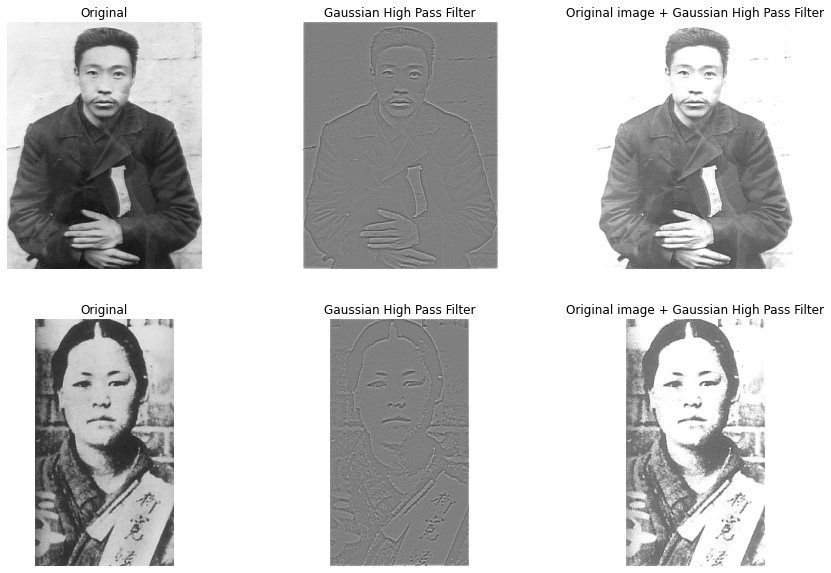

In [57]:
# Plotting해서 결과를 보여주세요.
fig = plt.figure(figsize = (15, 10)) # rows*cols 행렬의 i번째 subplot 생성
rows = 2
cols = 3

ax1 = fig.add_subplot(rows, cols, 1)
I1_RGB = cv2.cvtColor(I1, cv2.COLOR_GRAY2RGB)
ax1.imshow(I1_RGB)
ax1.set_title('Original')
ax1.axis("off")

ax2 = fig.add_subplot(rows, cols, 2)
ax2.imshow(result1_RGB)
ax2.set_title('Gaussian High Pass Filter')
ax2.axis("off")

ax3 = fig.add_subplot(rows, cols, 3)
ax3.imshow(result1_added_RGB)
ax3.set_title('Original image + Gaussian High Pass Filter')
ax3.axis("off")

ax4 = fig.add_subplot(rows, cols, 4)
I2_RGB = cv2.cvtColor(I2, cv2.COLOR_GRAY2RGB)
ax4.imshow(I2_RGB)
ax4.set_title('Original')
ax4.axis("off")

ax5 = fig.add_subplot(rows, cols, 5)
ax5.imshow(result2_RGB)
ax5.set_title('Gaussian High Pass Filter')
ax5.axis("off")

ax5 = fig.add_subplot(rows, cols, 6)
ax5.imshow(result2_added_RGB)
ax5.set_title('Original image + Gaussian High Pass Filter')
ax5.axis("off")

plt.show()